In [5]:
#find Words: Write a regex to find all words that start with "a".
import re
text_s = "Apples and oranges are available."
pattern = re.compile(r'^[a-zA-Z]+')
matches = pattern.finditer(text_s)
for match in matches:
    print(match)

<re.Match object; span=(0, 6), match='Apples'>


In [7]:
#Extract Words: Write a regex to extract all words from a sentence.
text_w = "This is a sample sentence."
#pattern = re.compile(r'[a-zA-z]+') #this one also works
pattern = re.compile(r'\b[a-zA-z]+\b') #this one also works
#pattern = re.compile(r'\w+')  #this one also works
matches = pattern.finditer(text_w)
for match in matches:
    print(match)

<re.Match object; span=(0, 4), match='This'>
<re.Match object; span=(5, 7), match='is'>
<re.Match object; span=(8, 9), match='a'>
<re.Match object; span=(10, 16), match='sample'>
<re.Match object; span=(17, 25), match='sentence'>


In [8]:
#Extract Prices: Write a regex to extract prices from a string, formatted as $XX.XX or XX.XX.
text_mon = "The price is $45.99."
pattern = re.compile(r'\$\d{2,10}\.\d{2}')
matches = pattern.finditer(text_mon)
for match in matches:
    print(match)

<re.Match object; span=(13, 19), match='$45.99'>


In [9]:
print("hello")

hello


In [13]:
import pandas as pd
header_names = ["user_id","age", "gender", "occupation", "zipcode"]
movie_user_df=pd.read_table("http://bit.ly/movieusers", sep="|",header=None, names=header_names)
#read records where users gender is equal to M
movie_user_df.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [19]:
#movie_user_df.loc[("gender"=="M"), :]
movie_user_df[(movie_user_df["gender"]=="M")].head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


In [22]:
#Or another way of doing is using loc
boolean_mask=(movie_user_df["gender"]=="M")
movie_user_df.loc[boolean_mask].head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


In [23]:
#another way of doing it merging both lines. 
movie_user_df.loc[(movie_user_df["gender"]=="M")].head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


In [30]:
#find data of movie users who are male and are either technician or writer
#two ways to do this.
#boolean_mask = (movie_users["gender"]=="M") & (movie_users["occupation"]=="student")

boolean_mask = (movie_user_df["gender"]=="M") & ((movie_user_df["occupation"]=="writer") | (movie_user_df["occupation"]=="technician"))
movie_user_df.loc[boolean_mask, :].head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
20,21,26,M,writer,30068
21,22,25,M,writer,40206


In [33]:
#another way of doing is using isin operator
boolean_mask_1 = (movie_user_df["gender"]=="M") & (movie_user_df["occupation"].isin(["writer","technician"]))
movie_user_df.loc[boolean_mask_1, :].head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
20,21,26,M,writer,30068
21,22,25,M,writer,40206


In [34]:
chips = pd.read_table("http://bit.ly/chiporders")
chips.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [45]:
#1 reduce column names to one word
#2 find rows where item cotains chicken in it
#3 remove $ from price column
#print(chips.columns)
print(chips.columns.str.split("_").str[-1])
print(chips.columns.str.split("_").str[-1].str[:5])

Index(['id', 'quantity', 'name', 'description', 'price'], dtype='object')
Index(['id', 'quant', 'name', 'descr', 'price'], dtype='object')


In [46]:
chips.columns = chips.columns.str.split("_").str[-1].str[:5]
chips.head()

,id,quant,name,descr,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [56]:
chips["newprice"] = chips["price"].str.replace("$","").astype(float)

In [57]:
chips["bill"] = chips["quant"] * chips["newprice"]

In [58]:
chips.head()

,id,quant,name,descr,price,newprice,bill
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96


In [72]:
#now find rows where name has chicken in it
chips.loc[(chips["name"].isin(["Izze"])), :].head()
chips.loc[(chips["name"].str.lower().str.find("chicken")!=-1), :].head()

,id,quant,name,descr,price,newprice,bill
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98,10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75,8.75,8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75,8.75,8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25,11.25


In [73]:
#another simple method to do is to just use contains method
chips.loc[(chips["name"].str.lower().str.contains("chicken")), :].head()

,id,quant,name,descr,price,newprice,bill
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98,10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75,8.75,8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75,8.75,8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25,11.25


In [16]:
import pandas as pd

# Sample data
data = {
    'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'customer': [1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5],
    'date_v': pd.to_datetime([
        '2024-10-01', '2024-10-03', '2024-10-04', '2024-10-05', '2024-12-04',
        '2024-10-01', '2024-10-02', '2024-10-05',
        '2024-10-01', '2024-10-03', '2024-10-05', '2024-10-10', '2024-11-03',
        '2024-10-01', '2024-10-04', '2024-10-05',
        '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-10', '2024-12-04'
    ]),
    'data_ba': [50, 20, 47, 36, 50, 21, 31, 20, 31, 19, 36, 23, 16, 44, 25, 16, 14, 13, 47, 23, 25]
}
df = pd.DataFrame(data)
# Sort by customer and date
df = df.sort_values(by=['customer', 'date_v'])

df['prev_data_ba'] = df.groupby('customer')['data_ba'].shift(1).fillna(df['data_ba']).astype(int)
df['diff'] = df['data_ba']-df['prev_data_ba']
df_new= df.loc[(df['diff']>0), :]
# df_new.head()
#result = df_new.groupby('customer').size().reset_index(name='recharge_count')
result = df_new.groupby('customer').value_counts()
result.head()

#there could have been different method, use value_count instead of size

customer  index  date_v      data_ba  prev_data_ba  diff
1         2      2024-10-04  47       20            27      1
          4      2024-12-04  50       36            14      1
2         6      2024-10-02  31       21            10      1
3         10     2024-10-05  36       19            17      1
5         18     2024-10-03  47       13            34      1
Name: count, dtype: int64

In [123]:
#Load a CSV file named data.csv into a Pandas DataFrame. Check the first 5 rows of the data to understand its structure.
import pandas as pd
df_chtgpt= pd.read_csv("C:\\Neel\\python-data\\Sales_Data\\Sales_Data\\Sales_April_2019.csv")
df_chtgpt.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#change the name of columns in place, new column name should have underscore and no space.
print(df_chtgpt.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [7]:
#one of the way to do is use rename function
df_new=df_chtgpt.rename(columns={"Order ID":"Order_ID"})
print(df_new)
#but this way, we will have to write it for each of columns. can there be an easy way

      Order_ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
18378   194090                Google Phone                1        600   
18379   194091       AA Batteries (4-pack)                1       3.84   
18380   194092      AAA Batteries (4-pack)                2       2.99   
18381   194093       AA Batteries (4-pack)                1       3.84   
18382   194094    Lightning Charging Cable                1      14.95   

           Order Date                        Purchase Address  
0      04/19/19 08:46            917 1st St, Da

In [16]:
import pandas as pd
df_chtgpt= pd.read_csv("C:\\Neel\\python-data\\Sales_Data\\Sales_Data\\Sales_April_2019.csv")
#df_chtgpt.head()

proper_column_names=[]
def column_name_change(str1):
    if " " in str1:
        proper_column_names.append(str1.replace(" ","_"))
    else:
        proper_column_names.append(str1)

for col in df_chtgpt.columns:
    print(col)
    column_name_change(col)
print(proper_column_names)
#df_chtgpt.columns = proper_column_names
#df_chtgpt.head()

Order ID
Product
Quantity Ordered
Price Each
Order Date
Purchase Address
['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']


In [84]:
#One more way is using either a function to do this replace or write a list comprehension
import pandas as pd
df_chtgpt= pd.read_csv("C:\\Neel\\python-data\\Sales_Data\\Sales_Data\\Sales_April_2019.csv")
#df_chtgpt.head()

def column_name_change(str1):
    if " " in str1:
        return str1.replace(" ","_")
    return str1

proper_column_names=[x.replace(" ","_") for x in df_chtgpt.columns]
df_chtgpt.columns = proper_column_names
print(list(map(column_name_change,df_chtgpt.columns)))
df_chtgpt.head()

['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#''' Loading Data
Load a CSV file named data.csv into a Pandas DataFrame. Check the first 5 rows of the data to understand its structure.
2. Data Summary and Info
Use Pandas to display a summary of the DataFrame. Include the number of non-null entries and data types of each column.
3. DataFrame Shape and Column Names
Find out the number of rows and columns in the DataFrame. Also, retrieve a list of all column names.
4. Accessing Columns and Rows
Select a single column (e.g., 'column_name') from the DataFrame and display the first 5 entries. Then, select multiple columns and display their first 5 entries.
5. Filtering Rows
Filter the DataFrame to show only the rows where values in a specific column (e.g., 'column_name') are greater than a certain value (e.g., 10).
6. Sorting Data
Sort the DataFrame based on a column’s values (e.g., 'column_name') in descending order. Display the first 10 rows of the sorted DataFrame.
7. Null Values Handling
Check for missing values in each column of the DataFrame. Replace all NaN values in a specific column (e.g., 'column_name') with 0.
8. Dropping Rows/Columns
Remove rows where a specific column has NaN values. Then, try to drop an entire column from the DataFrame.
9. Basic Statistics
Calculate the mean, median, and standard deviation of a numeric column (e.g., 'numeric_column'). Also, calculate summary statistics for all numeric columns.
10. Unique Values and Counts
Find the unique values in a column and calculate the count of each unique value. Use this to get an overview of the distribution in a categorical column.
11. Adding New Columns
Add a new column to the DataFrame that is derived from existing columns. For example, if there are two numeric columns, create a new column that is their sum.
12. Renaming Columns
Rename specific columns in the DataFrame (e.g., rename 'old_column_name' to 'new_column_name'). Then, rename all columns by changing them to uppercase.
13. Grouping and Aggregating
Group the DataFrame by a categorical column and calculate the average of another column within each group. Display the result.
14. Applying Custom Functions
Write a function that operates on a column (e.g., a function that increases each value by 10%) and apply it to a numeric column using .apply().
15. Merging DataFrames
Create a second DataFrame with some common columns (e.g., ID column), and merge it with the first DataFrame on the common column. Use different types of joins (e.g., inner, left) and observe the results.
'''

In [31]:
#Find out the number of rows and columns in the DataFrame. Also, retrieve a list of all column names.
df_chtgpt.shape #and this is a tuple, so we can extract no of rows, and columns separately
print(f'no of rows are {df_chtgpt.shape[0]}')
print(f'no of columns are {df_chtgpt.shape[1]}')
df_chtgpt.shape

no of rows are 18383
no of columns are 6


(18383, 6)

In [35]:
#Select a single column (e.g., 'column_name') from the DataFrame and display the first 5 entries. 
#Then, select multiple columns and display their first 5 entries.
#df_chtgpt["Order_ID"].head()
df_chtgpt[["Order_ID","Product"]].head()

,Order_ID,Product
0,176558,USB-C Charging Cable
1,NaN,NaN
2,176559,Bose SoundSport Headphones
3,176560,Google Phone
4,176560,Wired Headphones


In [48]:
#Filter the DataFrame to show only the rows where values in a specific column (e.g., 'column_name') are greater than a certain value (e.g., 10).
#show records where price is more than 100
#first check the datatype of each column 

#df_chtgpt.dtypes #this shows everything is object type i.e string datatype, create a separate column price with numberic type. astype(float)
#df_chtgpt.head()
df_chtgpt["price"]= Price_Each.str.strip().astype(float)
df_chtgpt.head()

ValueError: could not convert string to float: 'Price Each'

In [46]:
df_chtgpt.isnull().sum(axis=1)

0        0
1        6
2        0
3        0
4        0
        ..
18378    0
18379    0
18380    0
18381    0
18382    0
Length: 18383, dtype: int64

In [49]:
#figure out what are different data-types does pd contains 
unique_types = {type(val) for val in df_chtgpt["Price_Each"]}
print(unique_types)

{<class 'str'>, <class 'float'>}


In [54]:
#find out what unique values does it contain of a particular data type
unique_types = [val for val in df_chtgpt["Price_Each"] if type(val)==float]
print(unique_types)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [57]:
unique_types = [val for val in df_chtgpt["Price_Each"] if type(val)==str]
print(unique_types)

['11.95', '99.99', '600', '11.99', '11.99', '11.95', '99.99', '11.95', '1700', '11.99', '600', '14.95', '389.99', '3.84', '14.95', '150', '11.95', '600', '11.95', '2.99', '150', '150', '150', '3.84', '11.95', '700', '99.99', '2.99', '300', '99.99', '99.99', '2.99', '600', '149.99', '109.99', '14.95', '600', '150', '11.95', '14.95', '11.99', '11.99', '150', '11.95', '2.99', '14.95', '389.99', '11.95', '14.95', '11.95', '11.95', '11.95', '600.0', '2.99', '700', '150', '2.99', '99.99', '150', '11.95', '3.84', '14.95', '11.95', '150', '14.95', '300', '11.95', '14.95', '3.84', '149.99', '3.84', '2.99', '99.99', '11.99', '14.95', '11.95', '600', '11.95', '2.99', '999.99', '14.95', '400', '3.84', '2.99', '11.95', '1700', '11.99', '14.95', '3.84', '1700', '11.95', '2.99', '1700', '600', '149.99', '11.95', '14.95', '700', '600.0', '3.84', '11.95', '150', '600', '999.99', '2.99', '109.99', '3.84', '11.99', '379.99', '99.99', '2.99', '999.99', '11.99', '389.99', '3.84', '149.99', '150', '2.99', '

In [61]:
#unique_types = [val for val in df_chtgpt["Price_Each"] if type(val)==str]
pd_n=pd.to_numeric(df_chtgpt["Price_Each"],errors='coerce').fillna(0).astype(float)
pd_n.head(10)

0      11.95
1       0.00
2      99.99
3     600.00
4      11.99
5      11.99
6      11.95
7      99.99
8      11.95
9    1700.00
Name: Price_Each, dtype: float64

In [63]:
df_chtgpt["price"] = pd.to_numeric(df_chtgpt["Price_Each"],errors='coerce').fillna(0).astype(float)
df_chtgpt.dtypes

Order_ID             object
Product              object
Quantity_Ordered     object
Price_Each           object
Order_Date           object
Purchase_Address     object
price               float64
dtype: object

In [64]:
#Filter the DataFrame to show only the rows where values in a specific column (e.g., 'column_name') are greater than a certain value (e.g., 10).
df_chtgpt.loc[(df_chtgpt["price"]>100), :].head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,price
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00
11,176567,Google Phone,1,600,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",600.00
13,176569,27in 4K Gaming Monitor,1,389.99,04/16/19 19:23,"657 Hill St, Dallas, TX 75001",389.99
16,176572,Apple Airpods Headphones,1,150,04/04/19 20:30,"149 Dogwood St, New York City, NY 10001",150.00
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00
21,176576,Apple Airpods Headphones,1,150,04/28/19 11:42,"771 Ridge St, Los Angeles, CA 90001",150.00
22,176577,Apple Airpods Headphones,1,150,04/04/19 19:25,"260 Spruce St, Dallas, TX 75001",150.00
23,176578,Apple Airpods Headphones,1,150,04/09/19 23:35,"513 Church St, Boston, MA 02215",150.00
26,176581,iPhone,1,700,04/09/19 21:38,"84 Jackson St, Boston, MA 02215",700.00


In [66]:
#Sort the DataFrame based on a column’s values (e.g., 'column_name') in descending order. Display the first 10 rows of the sorted DataFrame.
#sort based on Quantity_Ordered (or price) 
df_chtgpt.sort_values(by=["price"], ascending=False).head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,price
11299,187347,Macbook Pro Laptop,1,1700,04/27/19 13:43,"289 Hickory St, San Francisco, CA 94016",1700.0
13553,189477,Macbook Pro Laptop,1,1700,04/11/19 21:31,"445 Walnut St, New York City, NY 10001",1700.0
6574,182838,Macbook Pro Laptop,1,1700,04/26/19 17:25,"880 Jefferson St, San Francisco, CA 94016",1700.0
9985,186087,Macbook Pro Laptop,1,1700,04/18/19 12:11,"271 Main St, Boston, MA 02215",1700.0
4962,181298,Macbook Pro Laptop,1,1700,04/01/19 21:39,"732 Hickory St, Boston, MA 02215",1700.0
645,177175,Macbook Pro Laptop,1,1700,04/11/19 07:49,"603 Lake St, Los Angeles, CA 90001",1700.0
8418,184602,Macbook Pro Laptop,1,1700,04/25/19 15:58,"254 Park St, Austin, TX 73301",1700.0
654,177182,Macbook Pro Laptop,1,1700,04/10/19 22:00,"332 10th St, Los Angeles, CA 90001",1700.0
2546,178996,Macbook Pro Laptop,1,1700,04/16/19 00:32,"950 8th St, Boston, MA 02215",1700.0
11887,187898,Macbook Pro Laptop,1,1700,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016",1700.0


In [67]:
#find distinct type of values in this column Quantity_Ordered
#convert all string type values to null and then fill 0 in them.
#if possible then count such converted values count
distinct_type_data = {type(val) for val in df_chtgpt["Quantity_Ordered"]}
print(distinct_type_data)

{<class 'str'>, <class 'float'>}


In [72]:
str_type= [val for val in df_chtgpt["Quantity_Ordered"] if type(val)==float]
print(str_type)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [76]:
df_chtgpt["qty"]=pd.to_numeric(df_chtgpt["Quantity_Ordered"],errors='coerce').fillna(0).astype(int)
df_chtgpt.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,price,qty
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",11.95,2
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,1


In [80]:
#if possible then count such converted values count
#find no of rows where column has NaN
df_chtgpt["Quantity_Ordered"].isnull().sum()

59

In [81]:
#if we have to find out which column has how many null values
df_chtgpt.isnull().sum()

Order_ID            59
Product             59
Quantity_Ordered    59
Price_Each          59
Order_Date          59
Purchase_Address    59
price                0
qty                  0
dtype: int64

In [83]:
#find out mean median mode and all other properties of a dataframe at high level
df_chtgpt.describe()

,price,qty
count,18383.000000,18383.000000
mean,183.487953,1.118860
std,330.328241,0.442622
min,0.000000,0.000000
25%,11.950000,1.000000
50%,14.950000,1.000000
75%,150.000000,1.000000
max,1700.000000,7.000000


In [85]:
#Remove rows where a specific column has NaN values. Then, try to drop an entire column from the DataFrame.
df_chtgpt.isnull().sum()

Order_ID            59
Product             59
Quantity_Ordered    59
Price_Each          59
Order_Date          59
Purchase_Address    59
dtype: int64

In [86]:
df_chtgpt.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [87]:
#how to remove rows having column containing NaN values
#first find out souch rows where order_id is null
df_chtgpt.loc[(df_chtgpt["Order_ID"].isna()==True), :].head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
new_df_nona=df_chtgpt.dropna()
new_df_nona.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [91]:
new_df_na=df_chtgpt.dropna(subset=["Order_ID"])
new_df_na.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [100]:
#how to create dataframe, without using random and with using random
df_df= pd.DataFrame({'name':['ram','shyam','ghanshyam'], 'rollno':['101','102','103']})
df_df.head()

,name,rollno
0,ram,101
1,shyam,102
2,ghanshyam,103


In [15]:
#with use of random
import random as rd
df_df= pd.DataFrame({'name':['ram','shyam','ghanshyam'], 'rollno':[rd.randint(101,150) for i in range(3)]})
df_df.head()


,name,rollno
0,ram,130
1,shyam,138
2,ghanshyam,125


In [16]:
list_1= [i for i in range(3)]
print(list_1)

[0, 1, 2]


In [104]:
import random
def get_name():
    alphabets = "abcdefghijklmnopqrstuvwxyz"
    name = "".join([alphabets[random.randint(0, len(alphabets)-1)] for i in range(5)])
    return name.title()
get_name()

'Rrkvv'

In [108]:
alphabets = "abcdefghijklmnopqrstuvwxyz"
print(alphabets[0:4])
print([alphabets[random.randint(0, len(alphabets)-1)]])

abcd
['h']


In [117]:
alphabets = "abcdefghijklmnopqrstuvwxyz"
print(alphabets[0:4])
print("".join([alphabets[random.randint(0, len(alphabets)-1)] for i in range(3)]))

abcd
yaq


In [17]:
#make a dataframe of 4 column, name, age, salary, gender(having only M or F)
import random
import pandas as pd
def get_name():
    alphabets = "abcdefghijklmnopqrstuvwxyz"
    name = "".join([alphabets[random.randint(0, len(alphabets)-1)] for i in range(5)])
    return name.title()

df_ran= pd.DataFrame({'name':[get_name() for i in range(10)]
                     ,'age':[random.randint(20,50) for i in range(10)]
                     ,'salary':[random.randint(10000,100000) for i in range(10)]
                     ,'gender':[['M','F'][random.randint(0,1)] for i in range(10)]
                     })
df_ran.head()
#now we can just increase the range value from 10 to 10000 and a big size dataframe will be ready

,name,age,salary,gender
0,Coaes,25,46272,F
1,Mbchl,35,85064,M
2,Awemb,29,54734,M
3,Vcefk,33,42712,M
4,Xeyfd,47,48963,F


In [18]:
#Calculate the mean, median, and standard deviation of a numeric column (e.g., 'numeric_column'). 
#Also, calculate summary statistics for all numeric columns.
#for summary statistics we can just use describe command
df_chtgpt.describe()


NameError: name 'df_chtgpt' is not defined

In [126]:
df_chtgpt.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [130]:
df_chtgpt["Quantity"] = pd.to_numeric(df_chtgpt["Quantity_Ordered"], errors='coerce').fillna(0).astype(int)
df_chtgpt.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Quantity
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1


In [131]:
#Now if we run describe, it will fetch it on basis of new int column quantity
df_chtgpt.describe()

,Quantity
count,18383.000000
mean,1.118860
std,0.442622
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [135]:
#now we can count min, median, mode, standard deviation for this dataframe and min, max and avg
min_1= df_chtgpt["Quantity"].mean()
print(min_1)
med_1= df_chtgpt["Quantity"].median()
print(med_1)
std_1= df_chtgpt["Quantity"].std()
print(std_1)
minim_1= df_chtgpt["Quantity"].min()
print(minim_1)
max_1= df_chtgpt["Quantity"].max()
print(max_1)
avg_1= df_chtgpt["Quantity"].avg()
print(avg_1)


1.118859816134472
1.0
0.44262174411565924
0
7


AttributeError: 'Series' object has no attribute 'avg'

In [ ]:
#Find the unique values in a column and calculate the count of each unique value. 
#Use this to get an overview of the distribution in a categorical column

In [19]:
#Rename specific columns in the DataFrame (e.g., rename 'old_column_name' to 'new_column_name'). 
#Then, rename all columns by changing them to uppercase.
#ans:=> actually rename is a function
df_ran.head()

,name,age,salary,gender
0,Coaes,25,46272,F
1,Mbchl,35,85064,M
2,Awemb,29,54734,M
3,Vcefk,33,42712,M
4,Xeyfd,47,48963,F


In [4]:
df_ran_1= df_ran.rename(columns={"salary":"sal"})
df_ran_1.head()

,name,age,sal,gender
0,Ajnqx,44,24596,F
1,Litny,30,63592,F
2,Zsrcf,34,50190,F
3,Jwqtr,43,54236,F
4,Xyepn,48,34225,F


In [6]:
#Then, rename all columns by changing them to uppercase.
#actually i did this type or renaming col at the top of this exercise sheet
print([col.upper() for col in df_ran_1.columns] )

['NAME', 'AGE', 'SAL', 'GENDER']


In [7]:
upper_col_names=[col.upper() for col in df_ran_1.columns]
df_ran_1.columns = upper_col_names
df_ran_1.head()

,NAME,AGE,SAL,GENDER
0,Ajnqx,44,24596,F
1,Litny,30,63592,F
2,Zsrcf,34,50190,F
3,Jwqtr,43,54236,F
4,Xyepn,48,34225,F


In [10]:
#Group the DataFrame by a categorical column and 
#calculate the average of another column within each group. 
#Display the result.
df_ran_1["GENDER"].value_counts()


GENDER
F    7
M    3
Name: count, dtype: int64

In [23]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.groupby("continent")["beer_servings"].sum() #its like select sum(beer_Servings) from tab gorup by continent
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [25]:
#14. Applying Custom Functions
#Write a function that operates on a column (e.g., a function that increases each value by 10%) and apply it to a numeric column using .apply().
drinks.head()
#increase beer_servings by 10%
drinks["new_beering_serving"] = drinks["beer_servings"] +  (drinks["beer_servings"] *.1)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,new_beering_serving
0,Afghanistan,0,0,0,0.0,Asia,0.0
1,Albania,89,132,54,4.9,Europe,97.9
2,Algeria,25,0,14,0.7,Africa,27.5
3,Andorra,245,138,312,12.4,Europe,269.5
4,Angola,217,57,45,5.9,Africa,238.7


In [17]:
#15. Merging DataFrames
#Create a second DataFrame with some common columns (e.g., ID column), 
#and merge it with the first DataFrame on the common column. Use different types of joins (e.g., inner, left) and observe the results.
import pandas as pd
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [85, 90, 95, 80]
})
df1.head()



,ID,Name,Score
0,1,Alice,85
1,2,Bob,90
2,3,Charlie,95
3,4,David,80


In [18]:
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'Age': [23, 34, 45, 29]
})

df2.head()

,ID,Name,Age
0,3,Charlie,23
1,4,David,34
2,5,Eve,45
3,6,Frank,29


In [19]:
df_3= pd.merge(df1,df2, on='ID', how='inner')
df_3.head()

,ID,Name_x,Score,Name_y,Age
0,3,Charlie,95,Charlie,23
1,4,David,80,David,34


In [20]:
df_3= pd.merge(df1,df2, on='ID', how='right')
df_3.head()

,ID,Name_x,Score,Name_y,Age
0,3,Charlie,95.0,Charlie,23
1,4,David,80.0,David,34
2,5,NaN,NaN,Eve,45
3,6,NaN,NaN,Frank,29


In [34]:
df_3= pd.merge(df1,df2, on='ID', how='outer')
df_3.head()

,ID,Name_x,Score,Name_y,Age
0,1,Alice,85.0,NaN,NaN
1,2,Bob,90.0,NaN,NaN
2,3,Charlie,95.0,Charlie,23.0
3,4,David,80.0,David,34.0
4,5,NaN,NaN,Eve,45.0


In [21]:
df_3= pd.merge(df1,df2, on='ID', how='inner')
df_3= df_3.drop(columns=["Name_y"])
df_3.head()

,ID,Name_x,Score,Age
0,3,Charlie,95,23
1,4,David,80,34


In [24]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [ ]:
# Find all countries in AFRICA that consume more beer than the average beer consumption in EUROPE
# first find avg beer consumption in Europe
drinks["beer_servings"].avg()

In [15]:
#revise regular expression 
import re
path = "C:\\Neel\\python-data\\sample_data.txt"
with open(path, 'r') as f:
    content = f.read()
pattern = re.compile(r'[A-Z]{2} \d{5}') #this is searching for two capital letter, space, and then 5 digits
matches = pattern.finditer(content)
for match in matches:
    print(match.group(0))
    state_code, zip_code= match.group(0).strip().split(" ")
    print(state_code)
    print(zip_code)
    break

RI 55924
RI
55924


In [25]:
#now i will revise pandas tutorial
#2nd q for eaxample filter records where continent ==Africa
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
drinks.loc[(drinks["continent"].str.lower()=='africa'), :].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [31]:
#find records where a column contains some values. 
#find records where country name has a space.
drinks.loc[(drinks["country"].str.lower().str.find(" ")!=-1)].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,North America
26,Burkina Faso,25,7,7,4.3,Africa
28,Cote d'Ivoire,37,1,7,4.0,Africa
29,Cabo Verde,144,56,16,4.0,Africa
33,Central African Republic,17,2,1,1.8,Africa


In [32]:
#we could have used contains function as well.
drinks.loc[(drinks["country"].str.lower().str.contains(" "))].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,North America
26,Burkina Faso,25,7,7,4.3,Africa
28,Cote d'Ivoire,37,1,7,4.0,Africa
29,Cabo Verde,144,56,16,4.0,Africa
33,Central African Republic,17,2,1,1.8,Africa


In [1]:
import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [34]:
#use all null functions isnull, isna, dropna, sort_values, value_count
ufo.isnull().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [35]:
ufo.isna().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [37]:
ufo.shape

(18241, 5)

In [39]:
ufo.dropna(subset=["City","State"]).shape
#so effectively there are 26 records where both column are null.

(18215, 5)

In [42]:
#fill Default in city wherver it has null values
new_df1=ufo.fillna({"City":"Default"})
new_df1.loc[(new_df1["City"]=="Default"), :].head()

,City,Colors Reported,Shape Reported,State,Time
21,Default,NaN,NaN,LA,8/15/1943 0:00
22,Default,NaN,LIGHT,LA,8/15/1943 0:00
204,Default,NaN,DISK,CA,7/15/1952 12:30
241,Default,BLUE,DISK,MT,7/4/1953 14:00
613,Default,NaN,DISK,NV,7/1/1960 12:00


In [46]:
ufo["City"].value_counts()["Phoenix"]

137

In [47]:
ufo["City"].value_counts().head()

City
Seattle          187
New York City    161
Phoenix          137
Houston          108
Las Vegas        105
Name: count, dtype: int64

In [49]:
ufo["City"].value_counts().index
#it is a series and that produces result like a dictionary

Index(['Seattle', 'New York City', 'Phoenix', 'Houston', 'Las Vegas',
       'Portland', 'San Diego', 'Los Angeles', 'Chicago', 'Austin',
       ...
       'Columbus City', 'Estill', 'Megargel', 'Faribault', 'Taft',
       'Lake Sonoma', 'Von Ormy', 'Grosse Pointe', 'Grosse Point', 'Ybor'],
      dtype='object', name='City', length=6475)

In [50]:
ufo["City"].value_counts().items

<bound method Series.items of City
Seattle          187
New York City    161
Phoenix          137
Houston          108
Las Vegas        105
                ... 
Lake Sonoma        1
Von Ormy           1
Grosse Pointe      1
Grosse Point       1
Ybor               1
Name: count, Length: 6475, dtype: int64>

In [51]:
ufo["City"].index

RangeIndex(start=0, stop=18241, step=1)

In [52]:
ufo["City"].items

<bound method Series.items of 0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object>

In [58]:
ufo["Colors Reported"].value_counts(dropna=False).head(15)
#value_counts by default does not show count of NaN, so if we have to see null count, then we have to pass dropna = False argument

Colors Reported
NaN               15359
RED                 780
GREEN               531
ORANGE              528
BLUE                450
YELLOW              169
RED GREEN            89
RED BLUE             78
RED ORANGE           44
GREEN BLUE           34
RED GREEN BLUE       33
ORANGE YELLOW        26
RED YELLOW           25
ORANGE GREEN         23
YELLOW GREEN         17
Name: count, dtype: int64

In [59]:
#find all countries in Africa, which consume more beer than avg consumption in Europe
#1st find avg consumption in Europe
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [66]:
#it can be done in 2 step, first find avg beer of Europe and then filter using loc 
avg_beer_Europe = drinks.groupby("continent")["beer_servings"].mean()["Europe"]
drinks.loc[(drinks["continent"]=="Africa") & (drinks["beer_servings"] > avg_beer_Europe), :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
4,Angola,217,57,45,5.9,Africa
62,Gabon,347,98,59,8.9,Africa
117,Namibia,376,3,1,6.8,Africa
159,South Africa,225,76,81,8.2,Africa


In [71]:
#find all countries in Africa, which consume more beer than avg consumption of whole world
avg_beer_world = drinks["beer_servings"].mean()
#its like select mean(beer_serving) from table, no need to put groupby clause
drinks.loc[(drinks["continent"]=="Africa") & (drinks["beer_servings"]>avg_beer_world)]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
4,Angola,217,57,45,5.9,Africa
22,Botswana,173,35,35,5.4,Africa
29,Cabo Verde,144,56,16,4.0,Africa
31,Cameroon,147,1,4,5.8,Africa
62,Gabon,347,98,59,8.9,Africa
117,Namibia,376,3,1,6.8,Africa
152,Seychelles,157,25,51,4.1,Africa
159,South Africa,225,76,81,8.2,Africa


In [69]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [76]:
drinks.loc[(drinks["continent"]=="Asia"), "beer_servings"].agg(["min", "max","sum","mean"])

min        0.000000
max      247.000000
sum     1630.000000
mean      37.045455
Name: beer_servings, dtype: float64

In [2]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
ufo.isnull().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [5]:
ufo["Shape Reported"].value_counts()

Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: count, dtype: int64

In [11]:
#select city, count(Shape Reported) from tab 
new_df_1= ufo.groupby("City")["Shape Reported"].count()
new_df_1.head(10)

City
Abbeville              1
Aberdeen               8
Abilene                3
Abingdon               2
Acampo                 1
Accokeek               0
Accord                 1
Acoma                  1
Acton                  3
Acton to Chelmsford    1
Name: Shape Reported, dtype: int64

In [12]:
ufo["Colors Reported"]= ufo["Colors Reported"].fillna("unknown")
ufo.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,unknown,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,unknown,OTHER,NJ,6/30/1930 20:00
2,Holyoke,unknown,OVAL,CO,2/15/1931 14:00
3,Abilene,unknown,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,unknown,LIGHT,NY,4/18/1933 19:00
5,Valley City,unknown,DISK,ND,9/15/1934 15:30
6,Crater Lake,unknown,CIRCLE,CA,6/15/1935 0:00
7,Alma,unknown,DISK,MI,7/15/1936 0:00
8,Eklutna,unknown,CIGAR,AK,10/15/1936 17:00
9,Hubbard,unknown,CYLINDER,OR,6/15/1937 0:00


In [13]:
ufo["Colors Reported"].value_counts()

Colors Reported
unknown                   15359
RED                         780
GREEN                       531
ORANGE                      528
BLUE                        450
YELLOW                      169
RED GREEN                    89
RED BLUE                     78
RED ORANGE                   44
GREEN BLUE                   34
RED GREEN BLUE               33
ORANGE YELLOW                26
RED YELLOW                   25
ORANGE GREEN                 23
YELLOW GREEN                 17
ORANGE BLUE                  10
RED YELLOW GREEN              9
YELLOW BLUE                   6
YELLOW GREEN BLUE             5
ORANGE GREEN BLUE             5
RED YELLOW GREEN BLUE         4
RED ORANGE YELLOW             4
RED YELLOW BLUE               3
RED ORANGE GREEN              3
RED ORANGE BLUE               3
RED ORANGE YELLOW BLUE        1
ORANGE YELLOW GREEN           1
ORANGE YELLOW BLUE            1
Name: count, dtype: int64

In [15]:
df_2 = pd.DataFrame({
    "name":["Adithya", "Manoj", "Adithya", "Sunil", "Risabh", "Sunil", "Adithya"],
    "salary":[10000, 20000, 10000, 35000, 50000, 35000, 10000],
    "age":[30, 24, 30, 33, 29, 33, 30]
})
df_2.head(10)

,name,salary,age
0,Adithya,10000,30
1,Manoj,20000,24
2,Adithya,10000,30
3,Sunil,35000,33
4,Risabh,50000,29
5,Sunil,35000,33
6,Adithya,10000,30


In [17]:
df_2.loc[df_2.duplicated(keep=False)]

,name,salary,age
0,Adithya,10000,30
2,Adithya,10000,30
3,Sunil,35000,33
5,Sunil,35000,33
6,Adithya,10000,30


In [21]:
df_2.drop_duplicates(keep=False)
#this will remove all duplicate rows

,name,salary,age
1,Manoj,20000,24
4,Risabh,50000,29


In [22]:
df_2.head()


,name,salary,age
0,Adithya,10000,30
1,Manoj,20000,24
2,Adithya,10000,30
3,Sunil,35000,33
4,Risabh,50000,29


In [24]:
df_2.drop_duplicates(keep="first")
#this will keep first record of duplicate records

,name,salary,age
0,Adithya,10000,30
1,Manoj,20000,24
3,Sunil,35000,33
4,Risabh,50000,29


In [29]:
movie_users = pd.read_table("http://bit.ly/movieusers",sep="|",header=None, names = ["user_id", "age", "gender", "occupation", "zip_code"])
movie_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [30]:
Countries = {
"Afghanistan" : "Kabul",
"Albania" : "Tirana",
"Algeria" : "Algiers",
"Andorra" : "Andorra la Vella",
"Angola" : "Luanda",
"Antigua and Barbuda" : "Saint John’s",
"Argentina" : "Buenos Aires",
"Armenia" : "Yerevan",
"Australia" : "Canberra",
"Austria" : "Vienna",
"Azerbaijan" : "Baku",
"The Bahamas" : "Nassau",
"Bahrain" : "Manama",
"Bangladesh" : "Dhaka",
"Barbados" : "Bridgetown",
"Belarus" : "Minsk",
"Belgium" : "Brussels",
"Belize" : "Belmopan",
"Benin" : "Porto-Novo",
"Bhutan" : "Thimphu",
"Bolivia" : "La Paz, Sucre",
"Bosnia and Herzegovina" : "Sarajevo",
"Botswana" : "Gaborone",
"Brazil" : "Brasilia",
"Brunei" : "Bandar Seri Begawan",
"Bulgaria" : "Sofia",
"Burkina Faso" : "Ouagadougou",
"Burundi" : "Bujumbura",
"Cambodia" : "Phnom Penh",
"Cameroon" : "Yaounde",
"Canada" : "Ottawa",
"Cape Verde" : "Praia",
"Central African Republic" : "Bangui",
"Chad" : "N’Djamena",
"Chile" : "Santiago",
"China" : "Beijing",
"Colombia" : "Bogota",
"Comoros" : "Moroni",
"Republic of the Congo": "Brazzaville",
"Democratic Republic of the Congo" : "Kinshasa",
"Costa Rica" : "San Jose",
"Cote d’Ivoire" : "Yamoussoukro",
"Croatia" : "Zagreb",
"Cuba" : "Havana",
"Cyprus" : "Nicosia",
"Czech Republic" : "Prague",
"Denmark" : "Copenhagen",
"Djibouti" : "Djibouti",
"Dominica" : "Roseau",
"Dominican Republic" : "Santo Domingo",
"East Timor" : "Dili",
"Ecuador" : "Quito",
"Egypt" : "Cairo",
"El Salvador" : "San Salvador",
"Equatorial Guinea" : "Malabo",
"Eritrea" : "Asmara",
"Estonia" : "Tallinn",
"Ethiopia" : "Addis Ababa",
"Fiji" : "Suva",
"Finland" : "Helsinki",
"France" : "Paris",
"Gabon" : "Libreville",
"The Gambia" : "Banjul",
"Georgia" : "Tbilisi",
"Germany" : "Berlin",
"Ghana" : "Accra",
"Greece" : "Athens",
"Grenada" : "Saint George’s",
"Guatemala" : "Guatemala City",
"Guinea" : "Conakry",
"Guinea-Bissau" : "Bissau",
"Guyana" : "Georgetown",
"Haiti" : "Port-au-Prince",
"Honduras" : "Tegucigalpa",
"Hungary" : "Budapest",
"Iceland" : "Reykjavik",
"India" : "New Delhi",
"Indonesia" : "Jakarta",
"Iran" : "Tehran",
"Iraq" : "Baghdad",
"Ireland" : "Dublin",
"Israel" : "Jerusalem",
"Italy" : "Rome",
"Jamaica" : "Kingston",
"Japan" : "Tokyo",
"Jordan" : "Amman",
"Kazakhstan" : "Astana",
"Kenya" : "Nairobi",
"Kiribati" : "Tarawa Atoll",
"North Korea" : "Pyongyang",
"South Korea" : "Seoul",
"Kosovo" : "Pristina",
"Kuwait" : "Kuwait City",
"Kyrgyzstan" : "Bishkek",
"Laos" : "Vientiane",
"Latvia" : "Riga",
"Lebanon" : "Beirut",
"Lesotho" : "Maseru",
"Liberia" : "Monrovia",
"Libya" : "Tripoli",
"Liechtenstein" : "Vaduz",
"Lithuania" : "Vilnius",
"Luxembourg" : "Luxembourg",
"Macedonia" : "Skopje",
"Madagascar" : "Antananarivo",
"Malawi" : "Lilongwe",
"Malaysia" : "Kuala Lumpur",
"Maldives" : "Male",
"Mali" : "Bamako",
"Malta" : "Valletta",
"Marshall Islands" : "Majuro",
"Mauritania" : "Nouakchott",
"Mauritius" : "Port Louis",
"Mexico" : "Mexico City",
"Federated States of Micronesia" : "Palikir",
"Moldova" : "Chisinau",
"Monaco" : "Monaco",
"Mongolia" : "Ulaanbaatar",
"Montenegro" : "Podgorica",
"Morocco" : "Rabat",
"Mozambique" : "Maputo",
"Myanmar" : "Naypyidaw",
"Namibia" : "Windhoek",
"Nauru" : "Yaren District",
"Nepal" : "Kathmandu",
"Netherlands" : "Amsterdam",
"New Zealand" : "Wellington",
"Nicaragua" : "Managua",
"Niger" : "Niamey",
"Nigeria" : "Abuja",
"Norway" : "Oslo",
"Oman" : "Muscat",
"Pakistan" : "Islamabad",
"Palau" : "Melekeok",
"Panama" : "Panama City",
"Papua New Guinea" : "Port Moresby",
"Paraguay" : "Asuncion",
"Peru" : "Lima",
"Philippines" : "Manila",
"Poland" : "Warsaw",
"Portugal" : "Lisbon",
"Qatar" : "Doha",
"Romania" : "Bucharest",
"Russia" : "Moscow",
"Rwanda" : "Kigali",
"Saint Kitts and Nevis" : "Basseterre",
"Saint Lucia" : "Castries",
"Saint Vincent and the Grenadines" : "Kingstown",
"Samoa" : "Apia",
"San Marino" : "San Marino",
"Sao Tome and Principe" : "Sao Tome",
"Saudi Arabia" : "Riyadh",
"Senegal" : "Dakar",
"Serbia" : "Belgrade",
"Seychelles" : "Victoria",
"Sierra Leone" : "Freetown",
"Singapore" : "Singapore",
"Slovakia" : "Bratislava",
"Slovenia" : "Ljubljana",
"Solomon Islands" : "Honiara",
"Somalia" : "Mogadishu",
"South Africa" : "Pretoria, Cape Town, Bloemfontein",
"South Sudan" : "Juba",
"Spain" : "Madrid",
"Sri Lanka" : "Colombo, Sri Jayewardenepura Kotte",
"Sudan" : "Khartoum",
"Suriname" : "Paramaribo",
"Swaziland" : "Mbabane",
"Sweden" : "Stockholm",
"Switzerland" : "Bern",
"Syria" : "Damascus",
"Taiwan" : "Taipei",
"Tajikistan" : "Dushanbe",
"Tanzania" : "Dodoma",
"Thailand" : "Bangkok",
"Togo" : "Lome",
"Tonga" : "Nuku’alofa",
"Trinidad and Tobago" : "Port-of-Spain",
"Tunisia" : "Tunis",
"Turkey" : "Ankara",
"Turkmenistan" : "Ashgabat",
"Tuvalu" : "Funafuti",
"Uganda" : "Kampala",
"Ukraine" : "Kyiv",
"United Arab Emirates" : "Abu Dhabi",
"United Kingdom" : "London",
"United States of America" : "Washington D.C.",
"Uruguay" : "Montevideo",
"Uzbekistan" : "Tashkent",
"Vanuatu" : "Port-Vila",
"Vatican City" : "Vatican City",
"Venezuela" : "Caracas",
"Vietnam" : "Hanoi",
"Yemen" : "Sanaa",
"Zambia" : "Lusaka",
"Zimbabwe" : "Harare"
}

In [35]:
for i in Countries.items():
    print(i)
    break
list1 = list(Countries.items())
print(list1[0])

('Afghanistan', 'Kabul')
('Afghanistan', 'Kabul')


In [41]:
import random
list1 = list(Countries.items())
print(list1[random.randint(0, len(Countries)-1)])

('Comoros', 'Moroni')


In [44]:
country_list= list(Countries.items())
def get_country_capital():
    return country_list[random.randint(0,len(country_list)-1)]
country,capital = get_country_capital()
print(f'capital of {country} is {capital}')

capital of Panama is Panama City


In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()
drinks["popular_drink"] = \
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax,
                                                     axis=1).map(dict(enumerate(drinks.loc[:, 'beer_servings':'wine_servings'].columns)))

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings']
drinks["popular_drink"]  = drinks["popular_drink"].apply(lambda x : x.split("_")[0].strip().title())
y = drinks["popular_drink"].value_counts().sort_values(ascending=False)
y.values
y.index
y[y.index[-1]]
y.index[0]
y[y.index[0]]


In [ ]:
for element in enumerate(subjects):
    print(element)

In [124]:
import pandas as pd
print(pd.to_datetime("25$12$1990", format='%d$%m$%Y'))



1990-12-25 00:00:00


print("hello")

In [1]:
print("hello")

hello


In [8]:
import os
import pandas as pd
path = "C:\\Neel\\python-data\\Sales_Data\\Sales_Data"
# for file in os.listdir(path):
#     print(file)
final_df = pd.DataFrame()
for file in os.listdir(path):
    full_path=f'{path}\\{file}'
    df=pd.read_csv(full_path)
    df["file_name"]=file
    pd.concat(final_df,df)
    #print(f'{file} has a shape {df.shape}')
final_df.head()

Sales_April_2019.csv has a shape (18383, 6)
Sales_August_2019.csv has a shape (12011, 6)
Sales_December_2019.csv has a shape (25117, 6)
Sales_February_2019.csv has a shape (12036, 6)
Sales_January_2019.csv has a shape (9723, 6)
Sales_July_2019.csv has a shape (14371, 6)
Sales_June_2019.csv has a shape (13622, 6)
Sales_March_2019.csv has a shape (15226, 6)
Sales_May_2019.csv has a shape (16635, 6)
Sales_November_2019.csv has a shape (17661, 6)
Sales_October_2019.csv has a shape (20379, 6)
Sales_September_2019.csv has a shape (11686, 6)


In [133]:
import os
import pandas as pd
path = "C:\\Neel\\python-data\\Sales_Data\\Sales_Data"
# for file in os.listdir(path):
#     print(file)
final_df = pd.DataFrame()
for file in os.listdir(path):
    full_path=f'{path}\\{file}'
    df=pd.read_csv(full_path)
    df["file_name"]=file
    final_df=pd.concat([final_df,df])
    #print(f'{file} has a shape {df.shape}')
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [134]:
#how to find distinct values of a column, for example file_name
final_df["file_name"].sort_values().drop_duplicates()

0            Sales_April_2019.csv
8007        Sales_August_2019.csv
16736     Sales_December_2019.csv
8021      Sales_February_2019.csv
6490       Sales_January_2019.csv
9594          Sales_July_2019.csv
9050          Sales_June_2019.csv
10153        Sales_March_2019.csv
11093          Sales_May_2019.csv
11776     Sales_November_2019.csv
13589      Sales_October_2019.csv
7790     Sales_September_2019.csv
Name: file_name, dtype: object

In [26]:
#could there be a different way to find unique values, without doing drop_duplicates
final_df["file_name"].sort_values().unique()

array(['Sales_April_2019.csv', 'Sales_August_2019.csv',
       'Sales_December_2019.csv', 'Sales_February_2019.csv',
       'Sales_January_2019.csv', 'Sales_July_2019.csv',
       'Sales_June_2019.csv', 'Sales_March_2019.csv',
       'Sales_May_2019.csv', 'Sales_November_2019.csv',
       'Sales_October_2019.csv', 'Sales_September_2019.csv'], dtype=object)

In [132]:
#from final_df can we convert 2 columns into numeric values, take 2 columns (Quantity Ordered,	Price Each)
final_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,file_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,0.00,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [135]:
final_df["Quantity_num"] = final_df["Quantity Ordered"].fillna(0).astype(float)
final_df["Price_num"] = final_df["Price Each"].fillna(0).astype(float)
final_df.head()

ValueError: could not convert string to float: 'Quantity Ordered'

In [136]:
#above code error out, because column has string values.
final_df["Quantity_num"] = pd.to_numeric(final_df["Quantity Ordered"],errors='coerce').fillna(0).astype(float)
final_df["Price_num"] = pd.to_numeric(final_df["Price Each"],errors='coerce').fillna(0).astype(float)
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name,Quantity_num,Price_num
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,2.0,11.95
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv,0.0,0.00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,1.0,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,11.99


In [125]:
#there could be multiple ways
#we can remove string datatype and then convert, doing this below code, we are excluding string contents of quantity ordered columns
working_data_df= final_df.loc[~(final_df["Quantity Ordered"]== "Quantity Ordered"), :]
working_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,0.00,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [35]:
#Now we can convert 
working_data_df["Quantity Ordered"].fillna(0).astype(float).head()

0    2.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Quantity Ordered, dtype: float64

In [126]:
#assignments
#1 # change the column names to lower case and replace the space with an underscore
final_df.head()
def column_name_change(col):
    return(col.replace(" ","_").lower())
        
final_df.columns=[column_name_change(col) for col in final_df.columns]
final_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,file_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,0.00,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [137]:
# change "Price Each" to Floating point number
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name,Quantity_num,Price_num
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,2.0,11.95
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv,0.0,0.00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,1.0,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,11.99


In [138]:
final_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
file_name             0
Quantity_num          0
Price_num             0
dtype: int64

In [128]:
working_df = final_df.loc[(type((final_df["Price Each"].fillna(0))!=str)),:]
workfing_df.head()

KeyError: 'Price Each'

In [139]:
working_df = final_df.loc[~(final_df["Price Each"].fillna(0)=="Price Each"),:]
working_df["Price Each"]=working_df["Price Each"].fillna(0).astype(float)
working_df.head()

C:\Users\neelk\AppData\Local\Temp\ipykernel_2972\4283565950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df["Price Each"]=working_df["Price Each"].fillna(0).astype(float)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name,Quantity_num,Price_num
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,2.0,11.95
1,NaN,NaN,NaN,0.00,NaN,NaN,Sales_April_2019.csv,0.0,0.00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,1.0,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,1.0,11.99


In [61]:
final_df["Price Each"]=pd.to_numeric(final_df["Price Each"],errors='coerce').fillna(0).astype(float)
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,file_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,0.00,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [67]:
# check for duplicate records , consider the columns Order ID through Purchase Address  to identify and 
# remove duplicate rows
working_df1= final_df.loc[:, "Order ID":"Purchase Address"]
#working_df2 = working_df1.loc[(working_df1.duplicated()==False)]
working_df2 = working_df1.loc[(working_df1.duplicated()==True), :].sort_values(by=["Product", 
                                                                                   "Quantity Ordered","Price Each","Order Date","Purchase Address"])
working_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9749,171322,20in Monitor,1,109.99,03/15/19 13:45,"357 Meadow St, Portland, ME 04101"
18194,193916,20in Monitor,1,109.99,04/18/19 12:59,"653 Cherry St, Dallas, TX 75001"
18172,276692,20in Monitor,1,109.99,10/23/19 10:52,"939 River St, Atlanta, GA 30301"
4457,154747,27in 4K Gaming Monitor,1,389.99,02/01/19 22:46,"367 Cedar St, Austin, TX 73301"
4701,241182,27in 4K Gaming Monitor,1,389.99,08/31/19 20:22,"580 6th St, New York City, NY 10001"


In [140]:
# working_df3= working_df1.drop_duplicates(subset="")
working_df1.shape

(186850, 11)

In [141]:
working_df3= working_df1.drop_duplicates(subset=["Product", "Quantity Ordered","Price Each","Order Date","Purchase Address"])
working_df3.shape

(185688, 11)

In [142]:
# find the month that has the highest sale and the month that has the lowest sale
# select month, max(sale), min(sale) group by month. wheresale = quantity* price 

#cleanup of dataframe is required first of all 
working_df1["quantity_num"] = pd.to_numeric(working_df1["Quantity Ordered"], errors='coerce').fillna(0).astype(int)
working_df1["price_num"] = pd.to_numeric(working_df1["Price Each"], errors='coerce').fillna(0).astype(float)
working_df1.head()

# find the sales by state
working_df1["state"]= working_df1["Purchase Address"].str.split(',').str[-1].str.strip().str.split(" ").str[0].fillna("Default")
working_df1["sale"] = working_df1["quantity_num"] * working_df1["price_num"]
working_df1.head()
working_df1.groupby("state")["sale"].sum()


state
CA          13714774.71
Default            0.00
GA           2795498.58
MA           3661642.01
ME            449758.27
NY           4664317.43
OR           1870732.34
Purchase           0.00
TX           4587557.15
WA           2747755.48
Name: sale, dtype: float64

<Axes: xlabel='city'>

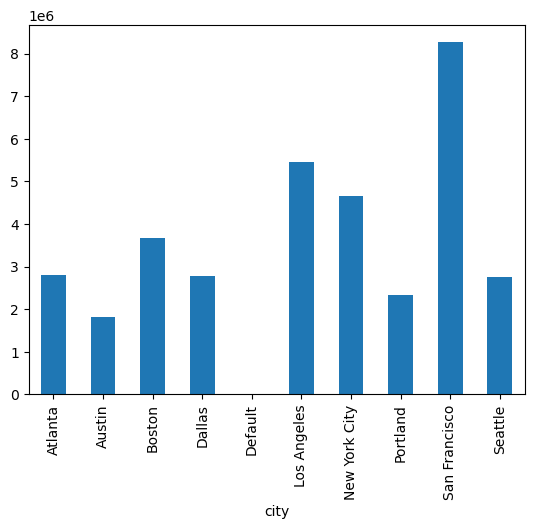

In [143]:
# find the sale by city --- Trick
working_df1["city"]= working_df1["Purchase Address"].str.split(',').str[1].str.strip().fillna("Default")
#working_df1.head()
working_df4= working_df1.drop(columns=["Quantity Ordered","Price Each"])
working_df4.head
working_df4.groupby("city")["sale"].sum().plot(kind="bar")


In [110]:
# find the month that has the highest sale and the month that has the lowest sale
# select month, max(sale), min(sale) group by month. wheresale = quantity* price 
working_df4["order_dt"]=  pd.to_datetime(working_df4["Order Date"],format='%m/%d/%y %H:%M',errors='coerce')
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

working_df4["month"]= working_df4["order_dt"].dt.month.map(month_mapping)
working_df4.groupby("month")["sale"].agg(["max","min"])

,max,min
month,,
Apr,3400.00,2.99
Aug,1700.00,2.99
Dec,1700.00,2.99
Feb,1700.00,2.99
Jan,1999.98,2.99
Jul,1700.00,2.99
Jun,3400.00,2.99
Mar,1700.00,2.99
May,3400.00,2.99


In [114]:
# compare the sales of The highest state with the second highest state
working_df4.groupby("state")["sale"].sum().sort_values(ascending=False)[:2]

state
CA    13714774.71
NY     4664317.43
Name: sale, dtype: float64

In [121]:
# find the total footfall of customers by Hour
#is it like select count(order_id) group by date, hour
working_df4["date"]= working_df4["order_dt"].dt.day
working_df4["hour"]= working_df4["order_dt"].dt.hour
working_df4.head()
working_df4.groupby(["date","hour"])["Order ID"].count()


date  hour
1.0   0.0     96
      1.0     69
      2.0     44
      3.0     27
      4.0     24
Name: Order ID, dtype: int64

In [ ]:
#9. #create dataframe with NaN, and using country dataset, using this content
def get_df(size):
    df = pd.DataFrame(
        {"name":[get_name() for i in range(size)],
         "salary":[random.randint(20000, 45000) for i in range(size)],
         "age":[random.randint(20, 50) for i in range(size)],
         "gender":[["M", "F"][random.randint(0,1)] for i in range(size)]
        })
    return df

In [ ]:
# what is the most common item sold in the most number of states?
# what are the common items that are sold most often together?
# ---- You may not be able to solve it 
# please look up merge in Pandas. How to merge two dataframes?

In [ ]:
#find total no of recharge done by customer, customer id data balance
'''one sample data is like this, but we can generate it using pd.DataFrame and random
customer_id date data_balance 
1 22/10/2020 108
1 25/10/2020 88 
1 27/10/2020 100

2 22/01/2020 108 
2 25/02/2020 88 
2 27/03/2020 77 
2 27/04/2020 177 
2 29/05/2020 377
'''

In [122]:
print("hello")

hello


In [144]:
print('hello')

hello


In [ ]:
#question where two df has to be merged i.e find product which are sold together. that will not happen in pair wise. 
# if one order had 2 products and one had 3 products, then concatination has to happen.

In [154]:
#can i generate a dataframe of 3 columns, customer_id (1,2,3) and date and balance amount. using random module
import pandas as pd
import random
def get_size(size):
    df = pd.DataFrame({'customer_id':[id for id in range(size)],
                       
                      'balance_amt':[random.randint(20,100) for i in range(size)]
                     })
    return df

new_df= get_size(5)
new_df.head()

,customer_id,balance_amt
0,0,99
1,1,48
2,2,20
3,3,77
4,4,42


In [162]:
#how to generate random date in python
#method-1
import random
def generate_random_date():
    year=random.randint(1900,2024)
    month=random.randint(1,12)
    date=random.randint(1,31)
    random_date= f'{year}/{month}/{date}'
    return random_date
print(generate_random_date())
#only catch here is what if it generates feb 31 or April 31 - then that validation has to be there. Is there any library python provides which can help


2003/11/13


In [163]:
Countries = {
"Afghanistan" : "Kabul",
"Albania" : "Tirana",
"Algeria" : "Algiers",
"Andorra" : "Andorra la Vella",
"Angola" : "Luanda",
"Antigua and Barbuda" : "Saint John’s",
"Argentina" : "Buenos Aires",
"Armenia" : "Yerevan",
"Australia" : "Canberra",
"Austria" : "Vienna",
"Azerbaijan" : "Baku",
"The Bahamas" : "Nassau",
"Bahrain" : "Manama",
"Bangladesh" : "Dhaka",
"Barbados" : "Bridgetown",
"Belarus" : "Minsk",
"Belgium" : "Brussels",
"Belize" : "Belmopan",
"Benin" : "Porto-Novo",
"Bhutan" : "Thimphu",
"Bolivia" : "La Paz, Sucre",
"Bosnia and Herzegovina" : "Sarajevo",
"Botswana" : "Gaborone",
"Brazil" : "Brasilia",
"Brunei" : "Bandar Seri Begawan",
"Bulgaria" : "Sofia",
"Burkina Faso" : "Ouagadougou",
"Burundi" : "Bujumbura",
"Cambodia" : "Phnom Penh",
"Cameroon" : "Yaounde",
"Canada" : "Ottawa",
"Cape Verde" : "Praia",
"Central African Republic" : "Bangui",
"Chad" : "N’Djamena",
"Chile" : "Santiago",
"China" : "Beijing",
"Colombia" : "Bogota",
"Comoros" : "Moroni",
"Republic of the Congo": "Brazzaville",
"Democratic Republic of the Congo" : "Kinshasa",
"Costa Rica" : "San Jose",
"Cote d’Ivoire" : "Yamoussoukro",
"Croatia" : "Zagreb",
"Cuba" : "Havana",
"Cyprus" : "Nicosia",
"Czech Republic" : "Prague",
"Denmark" : "Copenhagen",
"Djibouti" : "Djibouti",
"Dominica" : "Roseau",
"Dominican Republic" : "Santo Domingo",
"East Timor" : "Dili",
"Ecuador" : "Quito",
"Egypt" : "Cairo",
"El Salvador" : "San Salvador",
"Equatorial Guinea" : "Malabo",
"Eritrea" : "Asmara",
"Estonia" : "Tallinn",
"Ethiopia" : "Addis Ababa",
"Fiji" : "Suva",
"Finland" : "Helsinki",
"France" : "Paris",
"Gabon" : "Libreville",
"The Gambia" : "Banjul",
"Georgia" : "Tbilisi",
"Germany" : "Berlin",
"Ghana" : "Accra",
"Greece" : "Athens",
"Grenada" : "Saint George’s",
"Guatemala" : "Guatemala City",
"Guinea" : "Conakry",
"Guinea-Bissau" : "Bissau",
"Guyana" : "Georgetown",
"Haiti" : "Port-au-Prince",
"Honduras" : "Tegucigalpa",
"Hungary" : "Budapest",
"Iceland" : "Reykjavik",
"India" : "New Delhi",
"Indonesia" : "Jakarta",
"Iran" : "Tehran",
"Iraq" : "Baghdad",
"Ireland" : "Dublin",
"Israel" : "Jerusalem",
"Italy" : "Rome",
"Jamaica" : "Kingston",
"Japan" : "Tokyo",
"Jordan" : "Amman",
"Kazakhstan" : "Astana",
"Kenya" : "Nairobi",
"Kiribati" : "Tarawa Atoll",
"North Korea" : "Pyongyang",
"South Korea" : "Seoul",
"Kosovo" : "Pristina",
"Kuwait" : "Kuwait City",
"Kyrgyzstan" : "Bishkek",
"Laos" : "Vientiane",
"Latvia" : "Riga",
"Lebanon" : "Beirut",
"Lesotho" : "Maseru",
"Liberia" : "Monrovia",
"Libya" : "Tripoli",
"Liechtenstein" : "Vaduz",
"Lithuania" : "Vilnius",
"Luxembourg" : "Luxembourg",
"Macedonia" : "Skopje",
"Madagascar" : "Antananarivo",
"Malawi" : "Lilongwe",
"Malaysia" : "Kuala Lumpur",
"Maldives" : "Male",
"Mali" : "Bamako",
"Malta" : "Valletta",
"Marshall Islands" : "Majuro",
"Mauritania" : "Nouakchott",
"Mauritius" : "Port Louis",
"Mexico" : "Mexico City",
"Federated States of Micronesia" : "Palikir",
"Moldova" : "Chisinau",
"Monaco" : "Monaco",
"Mongolia" : "Ulaanbaatar",
"Montenegro" : "Podgorica",
"Morocco" : "Rabat",
"Mozambique" : "Maputo",
"Myanmar" : "Naypyidaw",
"Namibia" : "Windhoek",
"Nauru" : "Yaren District",
"Nepal" : "Kathmandu",
"Netherlands" : "Amsterdam",
"New Zealand" : "Wellington",
"Nicaragua" : "Managua",
"Niger" : "Niamey",
"Nigeria" : "Abuja",
"Norway" : "Oslo",
"Oman" : "Muscat",
"Pakistan" : "Islamabad",
"Palau" : "Melekeok",
"Panama" : "Panama City",
"Papua New Guinea" : "Port Moresby",
"Paraguay" : "Asuncion",
"Peru" : "Lima",
"Philippines" : "Manila",
"Poland" : "Warsaw",
"Portugal" : "Lisbon",
"Qatar" : "Doha",
"Romania" : "Bucharest",
"Russia" : "Moscow",
"Rwanda" : "Kigali",
"Saint Kitts and Nevis" : "Basseterre",
"Saint Lucia" : "Castries",
"Saint Vincent and the Grenadines" : "Kingstown",
"Samoa" : "Apia",
"San Marino" : "San Marino",
"Sao Tome and Principe" : "Sao Tome",
"Saudi Arabia" : "Riyadh",
"Senegal" : "Dakar",
"Serbia" : "Belgrade",
"Seychelles" : "Victoria",
"Sierra Leone" : "Freetown",
"Singapore" : "Singapore",
"Slovakia" : "Bratislava",
"Slovenia" : "Ljubljana",
"Solomon Islands" : "Honiara",
"Somalia" : "Mogadishu",
"South Africa" : "Pretoria, Cape Town, Bloemfontein",
"South Sudan" : "Juba",
"Spain" : "Madrid",
"Sri Lanka" : "Colombo, Sri Jayewardenepura Kotte",
"Sudan" : "Khartoum",
"Suriname" : "Paramaribo",
"Swaziland" : "Mbabane",
"Sweden" : "Stockholm",
"Switzerland" : "Bern",
"Syria" : "Damascus",
"Taiwan" : "Taipei",
"Tajikistan" : "Dushanbe",
"Tanzania" : "Dodoma",
"Thailand" : "Bangkok",
"Togo" : "Lome",
"Tonga" : "Nuku’alofa",
"Trinidad and Tobago" : "Port-of-Spain",
"Tunisia" : "Tunis",
"Turkey" : "Ankara",
"Turkmenistan" : "Ashgabat",
"Tuvalu" : "Funafuti",
"Uganda" : "Kampala",
"Ukraine" : "Kyiv",
"United Arab Emirates" : "Abu Dhabi",
"United Kingdom" : "London",
"United States of America" : "Washington D.C.",
"Uruguay" : "Montevideo",
"Uzbekistan" : "Tashkent",
"Vanuatu" : "Port-Vila",
"Vatican City" : "Vatican City",
"Venezuela" : "Caracas",
"Vietnam" : "Hanoi",
"Yemen" : "Sanaa",
"Zambia" : "Lusaka",
"Zimbabwe" : "Harare"
}

In [184]:
for i in Countries.items():
    country,city=i
    print(country)
    print(city)
    break
# random.randint(0, 
print(len(Countries))
l1= [i for i in Countries.items()]
print(l1[random.randint(0,len(l1))] )

Afghanistan
Kabul
196
('Macedonia', 'Skopje')


In [202]:
#above is a countries dictionary, we need to use it in below code to make a dataframe. First we will convert dict to list
list_country_capital= [i for i in Countries.items()]
def get_df(size):
    df = pd.DataFrame(
        {
         # "name":[get_name() for i in range(size)],
         "salary":[random.randint(20000, 45000) for i in range(size)],
         "age":[random.randint(20, 50) for i in range(size)],
         "gender":[["M", "F"][random.randint(0,1)] for i in range(size)],
         "pair":[l1[random.randint(0,len(l1))] for i in range(size)],
        })
    return df
df123 = get_df(5)
df123["country"]= df123["pair"].str.strip().strsplit(",").str()[0]
df123.head()

NameError: name 'country_capital_list' is not defined

In [206]:
list_country_capital= [i for i in Countries.items()]
def get_df(size):
    df = pd.DataFrame(
        {
         # "name":[get_name() for i in range(size)],
         "salary":[random.randint(20000, 45000) for _ in range(size)],
         "age":[random.randint(20, 50) for _ in range(size)],
         "gender":[["M", "F"][random.randint(0,1)] for _ in range(size)], 
        "country": [random.choice(list_country_capital)[0] for _ in range(10)],
        "capital": [random.choice(list_country_capital)[1] for _ in range(10)]
        })
    return df
df_new1=get_df(10)
df_new1.head()

,salary,age,gender,country,capital
0,32314,33,F,Finland,Prague
1,29200,20,M,United Kingdom,Bujumbura
2,26487,40,F,Paraguay,Guatemala City
3,33830,22,M,Madagascar,Ulaanbaatar
4,23621,20,F,Federated States of Micronesia,Baghdad


In [207]:
list_country_capital= [i for i in Countries.items()]
selected_pairs = [random.choice(list_country_capital) for _ in range(10)]
df123 = pd.DataFrame({
    "salary": [random.randint(20000, 45000) for _ in range(10)],
    "age": [random.randint(20, 50) for _ in range(10)],
    "gender": [random.choice(["M", "F"]) for _ in range(10)],
    "country": [pair[0] for pair in selected_pairs],
    "capital": [pair[1] for pair in selected_pairs]
})
df123.head()

,salary,age,gender,country,capital
0,39962,24,M,Togo,Lome
1,27385,42,F,Turkey,Ankara
2,26732,41,M,Somalia,Mogadishu
3,44270,27,F,Spain,Madrid
4,24815,28,F,Cote d’Ivoire,Yamoussoukro


In [208]:
country_capital_list = list(Countries.items())

# Create DataFrame directly from a list of records
df123 = pd.DataFrame.from_records(
    [
        {
            "salary": random.randint(20000, 45000),
            "age": random.randint(20, 50),
            "gender": random.choice(["M", "F"]),
            "country": country,
            "capital": capital
        }
        for country, capital in random.choices(country_capital_list, k=10)
    ]
)
df123.head()

,salary,age,gender,country,capital
0,39922,33,M,Swaziland,Mbabane
1,34459,38,M,Pakistan,Islamabad
2,23768,21,M,South Korea,Seoul
3,34567,28,M,Comoros,Moroni
4,23104,31,F,Portugal,Lisbon


In [209]:
#one more way
import pandas as pd
import random

country_capital_list = list(Countries.items())

df123 = pd.DataFrame({
    "salary": [random.randint(20000, 45000) for _ in range(10)],
    "age": [random.randint(20, 50) for _ in range(10)],
    "gender": [random.choice(["M", "F"]) for _ in range(10)]
})

def select_country_capital():
    return random.choice(country_capital_list)

df123[['country', 'capital']] = df123.apply(lambda row: pd.Series(select_country_capital()), axis=1)

print(df123)


   salary  age gender      country      capital
0   36047   44      F         Fiji         Suva
1   28821   30      M         Iran       Tehran
2   31845   34      M         Cuba       Havana
3   25645   48      M        Niger       Niamey
4   38203   44      M       Greece       Athens
5   40634   49      F       Malawi     Lilongwe
6   42632   33      M       Mexico  Mexico City
7   24478   29      M      Somalia    Mogadishu
8   30800   28      F      Vietnam        Hanoi
9   23646   34      M  South Sudan         Juba


In [230]:
list_country_capital= [i for i in Countries.items()]
def get_df(size):
    df = pd.DataFrame(
        {
         # "name":[get_name() for i in range(size)],
         "salary":[random.randint(20000, 45000) for i in range(size)],
         "age":[random.randint(20, 50) for i in range(size)],
         "gender":[["M", "F"][random.randint(0,1)] for i in range(size)],
            #  df123["pair"]:[l1[random.randint(0,len(l1))] for i in range(size)], # this is not working
         "num":[random.randint(0,len(list_country_capital)-1) for i in range(size)],
        })
    return df
df123 = get_df(100)
# df123["country"]= df123["pair"].str.strip().strsplit(",").str()[0] #
#df123["country"] = list_country_capital[df123["num"]] # this is not working
df123["country"] = [list_country_capital[num][0] for num in df123["num"]]
df123["city"] = [list_country_capital[num][1] for num in df123["num"]]
df123.head()

,salary,age,gender,num,country,city
0,39340,30,F,184,United Arab Emirates,Abu Dhabi
1,38047,29,F,166,Suriname,Paramaribo
2,33313,22,F,167,Swaziland,Mbabane
3,30748,45,F,122,Namibia,Windhoek
4,44672,21,M,107,Maldives,Male


In [204]:
#make a dataframe using random and countries dictionary, add two column country, captial_city using above dictionary
#also make a dataframe using random and column having NaN, if possible ensure 5% of data is having NaN 
#use thhis block
def get_df(size):
    df = pd.DataFrame(
        {"name":[get_name() for i in range(size)],
         "salary":[random.randint(20000, 45000) for i in range(size)],
         "age":[random.randint(20, 50) for i in range(size)],
         "gender":[["M", "F"][random.randint(0,1)] for i in range(size)]
        })
    return df

In [222]:
import datetime
y=random.randint(m>1900)

x = datetime.datetime(y, 5, 17)

print(x)

NameError: name 'm' is not defined

In [223]:
import datetime
import random
y=random.randint(1900,2100)

x = datetime.datetime(y, 5, 17)

print(x)

1961-05-17 00:00:00


In [231]:
import random
import numpy as np

df123['salary'] = df123['salary'].apply(lambda x: np.nan if random.random() < 0.05 else x)
df123.head()
df123.shape


(100, 6)

In [232]:
df123.isnull().sum()

salary     5
age        0
gender     0
num        0
country    0
city       0
dtype: int64

In [235]:
#question where two df has to be merged i.e find product which are sold together. that will not happen in pair wise. 
# if one order had 2 products and one had 3 products, then concatination has to happen.

working_df4["Order ID"].value_counts()

Order ID
Order ID    355
160873        5
289117        4
226625        4
277875        4
           ... 
158177        1
158178        1
158179        1
158180        1
259357        1
Name: count, Length: 178438, dtype: int64

In [236]:
working_df4.head()

,Order ID,Product,Order Date,Purchase Address,quantity_num,price_num,state,sale,city
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,11.95,TX,23.90,Dallas
1,NaN,NaN,NaN,NaN,0,0.00,Default,0.00,Default
2,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,99.99,MA,99.99,Boston
3,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,600.00,CA,600.00,Los Angeles
4,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,11.99,CA,11.99,Los Angeles


In [237]:
working_df4.isnull().sum()

Order ID            545
Product             545
Order Date          545
Purchase Address    545
quantity_num          0
price_num             0
state                 0
sale                  0
city                  0
dtype: int64

In [238]:
working_df4.shape

(186850, 9)

In [298]:
#records where orderID is not null
working_df5 =working_df4.loc[~(working_df4["Order ID"].isna())]

In [299]:
working_df5.head()

,Order ID,Product,Order Date,Purchase Address,quantity_num,price_num,state,sale,city
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,11.95,TX,23.90,Dallas
2,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,99.99,MA,99.99,Boston
3,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,600.00,CA,600.00,Los Angeles
4,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,11.99,CA,11.99,Los Angeles
5,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,11.99,CA,11.99,Los Angeles


In [250]:
#question where two df has to be merged i.e find product which are sold together. that will not happen in pair wise. 
working_df5.groupby(['Order ID'])['Product'].head().transform(lambda x : ' '.join(x)) 
# working_df5.head()

0                  U S B - C   C h a r g i n g   C a b l e
2        B o s e   S o u n d S p o r t   H e a d p h o ...
3                                  G o o g l e   P h o n e
4                          W i r e d   H e a d p h o n e s
5                          W i r e d   H e a d p h o n e s
                               ...                        
11681          A A A   B a t t e r i e s   ( 4 - p a c k )
11682                                          i P h o n e
11683                                          i P h o n e
11684          3 4 i n   U l t r a w i d e   M o n i t o r
11685              U S B - C   C h a r g i n g   C a b l e
Name: Product, Length: 185955, dtype: object

In [259]:
# working_df5.groupby(['Order ID'])['Product'].head().transform(lambda x : ' '.join(x)) 

#result = working_df5.groupby('Order ID').agg({'Product': ', '.join})

working_df5.loc[(working_df5["Order ID"])==176560, [["Order ID","product"]]].head()

KeyError: "None of [Index([('Order ID', 'product')], dtype='object')] are in the [columns]"

In [289]:
working_df5 =working_df4.loc[~(working_df4["Order ID"].isna())]

# Group by 'Order ID' and concatenate the 'Product' values for each order
result = working_df5.groupby('Order ID').agg({'Product': ', '.join})
result = result.reset_index()

# result.loc[result.duplicated("Order ID")].head(100)
# result.loc[(result["Order ID"]=="160873")]
product_counts = result['Product'].value_counts()
# result.loc[(result.groupby(["Order ID","Product"]).count()>1)]

In [290]:
#this is much easier code below
result_1 = working_df5.groupby('Order ID')['Product'].apply(', '.join).reset_index()

result_1.loc[(result_1["Order ID"]=="160873")]

,Order ID,Product
19639,160873,"iPhone, Lightning Charging Cable, Apple Airpod..."


In [ ]:
#this is much easier code below
result_1 = working_df5.groupby('Order ID')['Product'].apply(', '.join).reset_index()

result_1.loc[(result_1["Order ID"]=="160873")]

In [297]:
#i need to order this result based on number of element in product column separated by comma
result_1.head()
result_1["no_of_product_together"]= result_1["Product"].str.split(",").apply(len)
result_1.sort_values(by="no_of_product_together",ascending=False).head(20)

,Order ID,Product,no_of_product_together
178437,Order ID,"Product, Product, Product, Product, Product, P...",355
19639,160873,"iPhone, Lightning Charging Cable, Apple Airpod...",5
154447,295681,"Google Phone, USB-C Charging Cable, Bose Sound...",4
71100,212334,"iPhone, Lightning Charging Cable, Apple Airpod...",4
136641,277875,"Google Phone, USB-C Charging Cable, Wired Head...",4
163568,304802,"Google Phone, USB-C Charging Cable, Bose Sound...",4
122684,263918,"Vareebadd Phone, USB-C Charging Cable, Bose So...",4
85391,226625,"Google Phone, USB-C Charging Cable, Wired Head...",4
52277,193511,"Google Phone, USB-C Charging Cable, Bose Sound...",4
155119,296353,"iPhone, Lightning Charging Cable, Wired Headph...",4


In [300]:
#now lets do it altogether for this code
result_1.head()

,Order ID,Product,no_of_product_together
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,1
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1


In [ ]:
result_1.groupby("Order ID")[["Product","no_of_product_together"]].count().sort_values(by="no_of_product_together", ascending=False).plot(kind="bar")

<Axes: xlabel='Order ID'>

In [14]:
#date: 7 nov 2024
#understand difference btween transform and apply when used on a group by context
#for example
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Charlie'],
    'Branch': ['Science', 'Arts', 'Arts', 'Science', 'Commerce', 'Math']
}

df = pd.DataFrame(data)
df.head()

#now lets try transform and apply, idea is to produce each candidate's branch concatenated.
df['Combined_Branch'] = df.groupby('Name')['Branch'].transform(lambda x: ', '.join(x))
#transform_df.reset_index()
df.head()


,Name,Branch,Combined_Branch
0,Alice,Science,"Science, Arts, Commerce"
1,Bob,Arts,"Arts, Science"
2,Alice,Arts,"Science, Arts, Commerce"
3,Bob,Science,"Arts, Science"
4,Alice,Commerce,"Science, Arts, Commerce"


In [15]:
#now you can see no of rows remains same. though we can do de-duplication here by dropping Branch and get desired result.
working_df = df.drop_duplicates(df.loc[:, ['Name','Combined_Branch']])
working_df.head()

,Name,Branch,Combined_Branch
0,Alice,Science,"Science, Arts, Commerce"
1,Bob,Arts,"Arts, Science"
5,Charlie,Math,Math


In [17]:
#Here again Branch is coming in output, so we need to filter them out
working_df1 = df[['Name','Combined_Branch']]
working_df1.drop_duplicates()

,Name,Combined_Branch
0,Alice,"Science, Arts, Commerce"
1,Bob,"Arts, Science"
5,Charlie,Math


In [18]:
#so using transform we had to go extra mile, now lets try apply
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Charlie'],
    'Branch': ['Science', 'Arts', 'Arts', 'Science', 'Commerce', 'Math']
}

dfx = pd.DataFrame(data)
dfx.head()

,Name,Branch
0,Alice,Science
1,Bob,Arts
2,Alice,Arts
3,Bob,Science
4,Alice,Commerce


In [23]:
dfx_working = dfx.groupby('Name')['Branch'].apply(lambda x: ', '.join(x))
dfx_working.head()
#one idea here is to reset index, so that Name comes has column
dfx_working = dfx_working.reset_index()
dfx_working.head()

,Name,Branch
0,Alice,"Science, Arts, Commerce"
1,Bob,"Arts, Science"
2,Charlie,Math


In [24]:
#in case of apply, output column name comes as "branch", but i wanted to see "combined_branch"
dfx_working_n = dfx_working = dfx.groupby('Name')['Branch'].apply(lambda x: ', '.join(x)).reset_index(name='combined_branch')
dfx_working_n.head()

,Name,combined_branch
0,Alice,"Science, Arts, Commerce"
1,Bob,"Arts, Science"
2,Charlie,Math


In [25]:
print("hellow")

hellow


In [27]:
import os
import pandas as pd
path = "C:\\Neel\\python-data\\Sales_Data\\Sales_Data"

final_df = pd.DataFrame()
for file in os.listdir(path):
    full_path=f'{path}\\{file}'
    df=pd.read_csv(full_path)
    df["file_name"]=file
    final_df=pd.concat([final_df,df])
    #print(f'{file} has a shape {df.shape}')
final_df.head()
final_df["file_name"].sort_values().drop_duplicates()

final_df["Quantity_num"] = pd.to_numeric(final_df["Quantity Ordered"],errors='coerce').fillna(0).astype(float)
final_df["Price_num"] = pd.to_numeric(final_df["Price Each"],errors='coerce').fillna(0).astype(float)
final_df.head()

working_df1= final_df.loc[:, :]


#not null records
#working_df5 =working_df4.loc[~(working_df4["Order ID"].isna())]

#Method 2 ##this is much easier code below
result_1 = working_df1.groupby('Order ID')['Product'].apply(', '.join).reset_index()
result_1.head()

#above code does not show comma separation has happened so far or not, so i have to sort it on basis of no of product per order
result_1["no_of_product_together"]= result_1["Product"].str.split(",").apply(len)
result_2= result_1.sort_values(by="no_of_product_together",ascending=False).head(20)
result_2.head(100)


,Order ID,Product,no_of_product_together
178437,Order ID,"Product, Product, Product, Product, Product, P...",355
19639,160873,"iPhone, Lightning Charging Cable, Apple Airpod...",5
154447,295681,"Google Phone, USB-C Charging Cable, Bose Sound...",4
71100,212334,"iPhone, Lightning Charging Cable, Apple Airpod...",4
136641,277875,"Google Phone, USB-C Charging Cable, Wired Head...",4
163568,304802,"Google Phone, USB-C Charging Cable, Bose Sound...",4
122684,263918,"Vareebadd Phone, USB-C Charging Cable, Bose So...",4
85391,226625,"Google Phone, USB-C Charging Cable, Wired Head...",4
52277,193511,"Google Phone, USB-C Charging Cable, Bose Sound...",4
155119,296353,"iPhone, Lightning Charging Cable, Wired Headph...",4
